# Wine Quality Analysis and Classification 

In [48]:
#importing libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import matplotlib
from matplotlib import pyplot as plt
import pylab

In [49]:
# Loading in the dataset
wine_df = pd.read_csv('winequality-red.csv', sep=';')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Making Distribution Histograms for variables 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

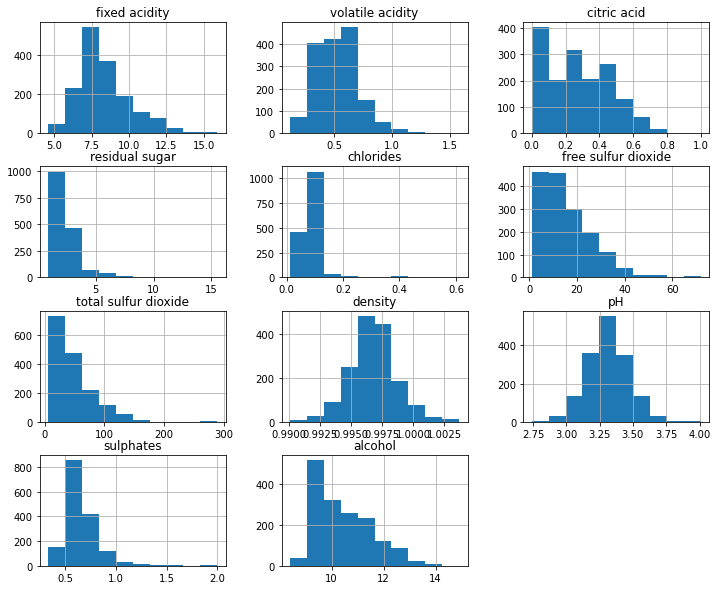

In [50]:
wine_df.iloc[:,:-1].hist(figsize=(12,10)) #we are excluding the variable quality  

In [51]:
print(wine_df['quality'].unique()) #finding the unique values of quality 

[5 6 7 4 8 3]


## Selecting two variables that affect the quality of wine 

In [52]:
# Save the predictor varialbles
fixed_acidity = wine_df[['fixed acidity']]
free_sulfur_dioxide = wine_df[['free sulfur dioxide']]
# Save your response variable
quality = wine_df[['quality']]

##  Plotting the correlation with respect to the quality variable, for each predictor.

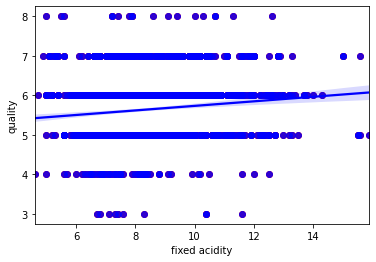

In [53]:
#Plotting the correlation for the fixed acidity variable 
import seaborn as sns 
plt.scatter(fixed_acidity, quality, c="r")
plt.xlabel("fixed acidity")
plt.ylabel("quality")
 
plot_corr_sns = sns.regplot(x="fixed acidity", y="quality", color="b", data=wine_df)

In [54]:
#calculating the correlation coefficient for fixed acidity 
import pingouin as pg
OUTDATED_IGNORE=1
corr_acid = pg.corr(fixed_acidity[['fixed acidity']].to_numpy().reshape(-1),quality[['quality']].to_numpy().reshape(-1))
print(corr_acid)

            n         r         CI95%         p-val      BF10     power
pearson  1599  0.124052  [0.08, 0.17]  6.495635e-07  7369.455  0.998749


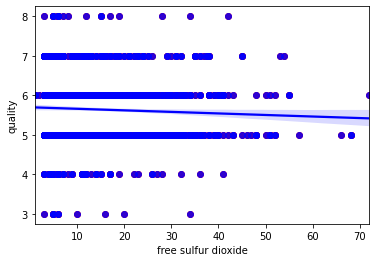

In [55]:
#Plotting the correlation for the free sulfur dioxide variable 
plt.scatter(free_sulfur_dioxide, quality, c="r")
plt.xlabel("free sulfur dioxide") 
plt.ylabel("quality")

plot_corr_sns = sns.regplot(x="free sulfur dioxide", y="quality", color="b", data=wine_df)

In [56]:
#calculating the correlation coefficient for free sulfur dioxide

corr_so = pg.corr(free_sulfur_dioxide[['free sulfur dioxide']].to_numpy().reshape(-1),  quality[['quality']].to_numpy().reshape(-1))
print(corr_so)

            n         r         CI95%     p-val   BF10     power
pearson  1599 -0.050656  [-0.1, -0.0]  0.042834  0.243  0.526355


## Splitting the dataset in train and test using the train_test_split() function

In [57]:
#Splitting the dataset for the fixed acidity variable 
X_train_acid, X_test_acid, y_train_acid, y_test_acid = train_test_split(fixed_acidity, quality, test_size= 0.20, random_state= 101)

In [58]:
##Splitting the dataset for the free sulfur dioxide variable
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(free_sulfur_dioxide, quality, test_size= 0.20, random_state= 101)

## Running linear regression experiments 

In [59]:
# Instantiate the Linear Regressor 
linreg_acid = LinearRegression()
# fitting the model - train; we will use the predictor fixed acidity 
regressor_trained_acid = linreg_acid.fit(X_train_acid, y_train_acid)

# Saving our model by using the module: 'pickle'
filename = 'lin_reg_model_acid.sav'
pickle.dump(regressor_trained_acid, open(filename, 'wb'))

In [60]:
linreg_so = LinearRegression()
# fitting the model - train; # fitting the model - train; we will use the predictor sulfur dioxide 
regressor_trained_so = linreg_so.fit(X_train_so, y_train_so)

# Saving our model by using the module: 'pickle'
filename = 'lin_reg_model_so.sav'
pickle.dump(regressor_trained_so, open(filename, 'wb'))

In [61]:
# convert model predictions into a dataframe
pred_acid = regressor_trained_acid.predict(X_test_acid)
df_pred_acid = pd.DataFrame(data=pred_acid, columns=["prediction"])
# concatenate the prediction fixed acidity and quality into the same dataframe
pd.concat([df_pred_acid, y_test_acid], axis=1)

,prediction,quality
0,5.645565,5.0
1,5.588764,NaN
2,5.595864,5.0
3,5.617164,NaN
4,5.574564,NaN
...,...,...
1554,NaN,6.0
1560,NaN,5.0
1562,NaN,5.0
1569,NaN,6.0


In [62]:
# convert model predictions into a dataframe
pred_so = regressor_trained_so.predict(X_test_so)
df_pred_so = pd.DataFrame(data=pred_so, columns=["prediction"])
# concatenate the prediction sulfur dioxide and quality into the same dataframe
pd.concat([df_pred_so, y_test_so], axis=1)

,prediction,quality
0,5.463800,5.0
1,5.698625,NaN
2,5.578040,5.0
3,5.511400,NaN
4,5.704972,NaN
...,...,...
1554,NaN,6.0
1560,NaN,5.0
1562,NaN,5.0
1569,NaN,6.0


## Evaluating the model against the test set data using mean_squared_error()

In [63]:
# print the actual `mean_squared_error()for fixed acidity 
mean_squared_error(pred_acid,y_test_acid)

0.7103399043044278

In [64]:
# print the actual `mean_squared_error()for sulfur dioxide 
mean_squared_error(pred_so,y_test_so)

0.7087882014613832